# 3D weylの分散関係の確認

In [1]:
using Plots
using LinearAlgebra

sigma = [[1.0 0.0; 0.0 1.0], [0.0 1.0; 1.0 0.0], [0.0 -1.0im; 1.0im 0.0], [1.0 0.0; 0.0 -1.0]]

4-element Vector{Matrix{ComplexF64}}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im]
 [0.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 0.0 + 0.0im]
 [0.0 + 0.0im -0.0 - 1.0im; 0.0 + 1.0im 0.0 + 0.0im]
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -1.0 + 0.0im]

In [2]:
struct Parm
    t1::Float64
    t2::Float64
    delta::Float64
    mu::Float64
    kw::Float64
end

In [3]:
mutable struct Hamiltonian
    Hk::Array{ComplexF64,2}
    E::Array{ComplexF64,1}
end

In [4]:
K_SIZE = 100
HSL = collect(0:pi/K_SIZE:5pi)
a = collect(0:pi/K_SIZE:pi)
size(HSL)

(500,)

In [5]:
function HV(k::NTuple{3, Float64},p::Parm)
    #=
    e0 = p.t2*(cos(k[1]+k[2]) + p.delta*cos(k[1]-k[2])) + p.mu
    ex = p.t1*(cos(p.kw)-cos(k[2]) + p.delta*(1.0-cos(k[3])))
    ey = p.t1*sin(k[3])
    ez = p.t1*(cos(p.kw)-cos(k[1]) + p.delta*(1.0-cos(k[3])))
    =#
    e0 = p.t2*cos(k[1]+k[2]) + p.delta*cos(k[1]-k[2]) + p.mu
    ex = p.t1*(cos(p.kw)-cos(k[2])) + p.delta*(1.0-cos(k[3]))
    ey = p.t1*sin(k[3])
    ez = p.t1*(cos(p.kw)-cos(k[1])) + p.delta*(1.0-cos(k[3]))
    ee = [e0, ex, ey, ez]
    H = ee' * sigma
    Hermitian(H)
    e, v = eigen(H)
    return H, e
end

HV (generic function with 1 method)

In [8]:
p = Parm(1.0, 0.2, -1.0, -0.2, pi/4)
EN = zeros(5*K_SIZE,2)
for i = 1:K_SIZE
    k = (pi-a[i],pi-a[i],0.0)
    H = Hamiltonian(HV(k,p)...)
    EN[i,:] .= H.E
end
for i = 1:K_SIZE
    k = (-a[i],-a[i],0.0)
    H = Hamiltonian(HV(k,p)...)
    EN[i+K_SIZE,:] .= H.E
end
for i = 1:K_SIZE
    k = (-pi,-pi+2.0*a[i],0.0)
    H = Hamiltonian(HV(k,p)...)
    EN[i+2K_SIZE,:] .= H.E
end
for i = 1:K_SIZE
    k = (-pi+a[i],pi-a[i],0.0)
    H = Hamiltonian(HV(k,p)...)
    EN[i+3K_SIZE,:] .= H.E
end
for i = 1:K_SIZE
    k = (a[i],-a[i],0.0)
    H = Hamiltonian(HV(k,p)...)
    EN[i+4K_SIZE,:] .= H.E
end

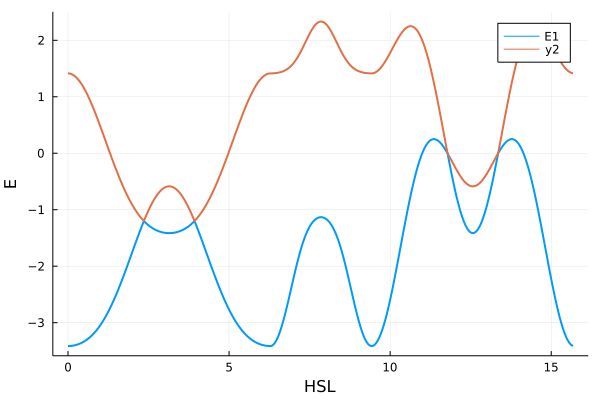

In [9]:
plot(HSL, EN[:,1], label="E1",xlabel="HSL",ylabel="E", width=2.0)
plot!(HSL, EN[:,2], width=2.0)